# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0

rg_flow = np.loadtxt('datfiles/he4plusplus_LO_semilocal_2_6_6_rg_flow.txt')

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [5]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
spectra = []
b2s = np.zeros(nR)

for i in range(nR):
    R, glo = rg_flow[i]
    s = he4.NonlocalHelium4System2(R, ELL, 2, 6, 6, nq=200)
    a0, r0 = s.a0_and_r0(glo, 0, momenta, use_c=True)
    spec = s.bound_state_spectrum(glo, 0)
    spectra.append(spec)
    b2 = np.abs(spec[0])
    
    a0s[i] = a0
    r0s[i] = r0
    b2s[i] = b2

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

1.0000e+02  6.4704e+00  1.2976e-03
1.0000e+02  6.7749e+00  1.3023e-03
1.0000e+02  7.0384e+00  1.3064e-03
1.0000e+02  7.2504e+00  1.3097e-03
1.0000e+02  7.4062e+00  1.3121e-03
1.0000e+02  7.5068e+00  1.3137e-03
1.0000e+02  7.5581e+00  1.3145e-03
1.0000e+02  7.5692e+00  1.3147e-03
1.0000e+02  7.5507e+00  1.3144e-03
1.0000e+02  7.5134e+00  1.3138e-03
1.0000e+02  7.4671e+00  1.3131e-03
1.0000e+02  7.4199e+00  1.3123e-03
1.0000e+02  7.3777e+00  1.3116e-03
1.0000e+02  7.3444e+00  1.3111e-03
1.0000e+02  7.3218e+00  1.3108e-03
1.0000e+02  7.3102e+00  1.3106e-03
1.0000e+02  7.3089e+00  1.3106e-03
1.0000e+02  7.3160e+00  1.3107e-03
1.0000e+02  7.3294e+00  1.3109e-03
1.0000e+02  7.3470e+00  1.3112e-03
1.0000e+02  7.3665e+00  1.3115e-03
1.0000e+02  7.3859e+00  1.3118e-03
1.0000e+02  7.4037e+00  1.3120e-03
1.0000e+02  7.4188e+00  1.3123e-03
1.0000e+02  7.4303e+00  1.3125e-03
1.0000e+02  7.4379e+00  1.3126e-03
1.0000e+02  7.4415e+00  1.3126e-03
1.0000e+02  7.4414e+00  1.3126e-03
1.0000e+02  7.4380e+

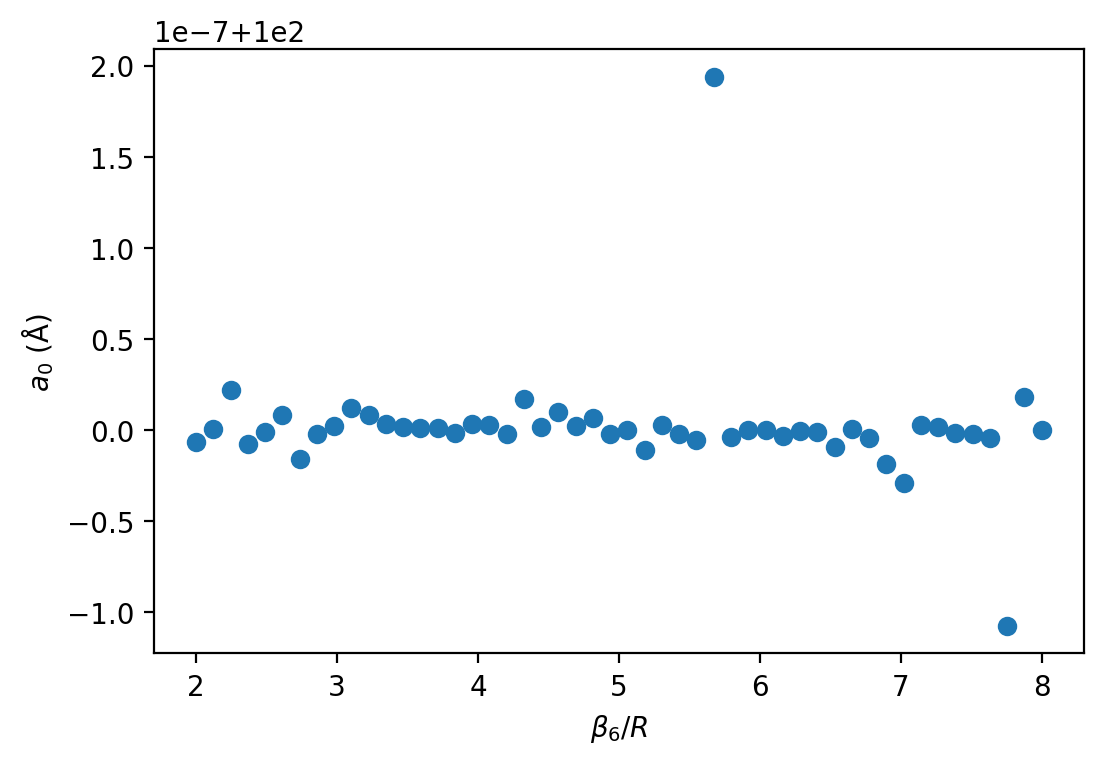

In [6]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], a0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

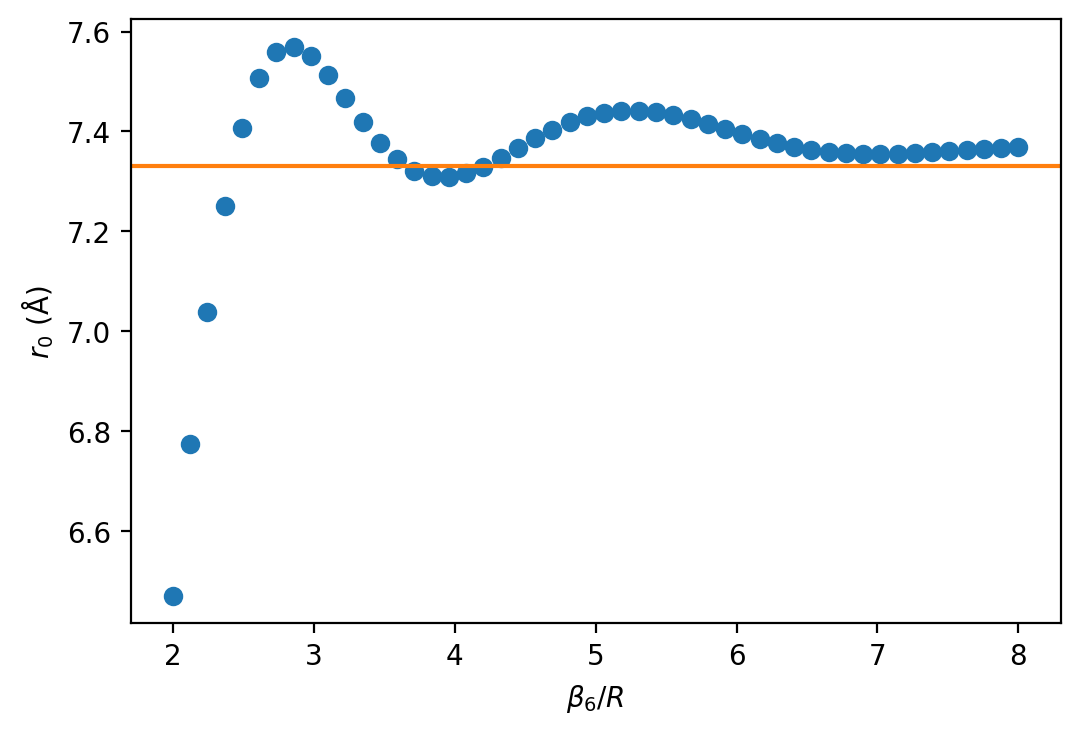

In [7]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], r0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [8]:
for (i, ratio) in enumerate(he4.BETA6/rg_flow[:, 0]):
    print(i, ratio)

0 2.0
1 2.1224489795918364
2 2.2448979591836733
3 2.36734693877551
4 2.489795918367347
5 2.6122448979591835
6 2.734693877551021
7 2.857142857142857
8 2.9795918367346936
9 3.1020408163265305
10 3.2244897959183674
11 3.346938775510204
12 3.4693877551020407
13 3.591836734693878
14 3.714285714285714
15 3.836734693877551
16 3.959183673469387
17 4.081632653061225
18 4.20408163265306
19 4.326530612244898
20 4.448979591836734
21 4.571428571428571
22 4.6938775510204085
23 4.816326530612245
24 4.938775510204082
25 5.061224489795918
26 5.183673469387755
27 5.3061224489795915
28 5.428571428571429
29 5.551020408163265
30 5.673469387755102
31 5.795918367346938
32 5.918367346938775
33 6.040816326530612
34 6.163265306122449
35 6.285714285714285
36 6.408163265306122
37 6.530612244897958
38 6.653061224489795
39 6.775510204081632
40 6.8979591836734695
41 7.020408163265307
42 7.142857142857142
43 7.26530612244898
44 7.387755102040816
45 7.510204081632653
46 7.632653061224489
47 7.755102040816326
48 7.8775

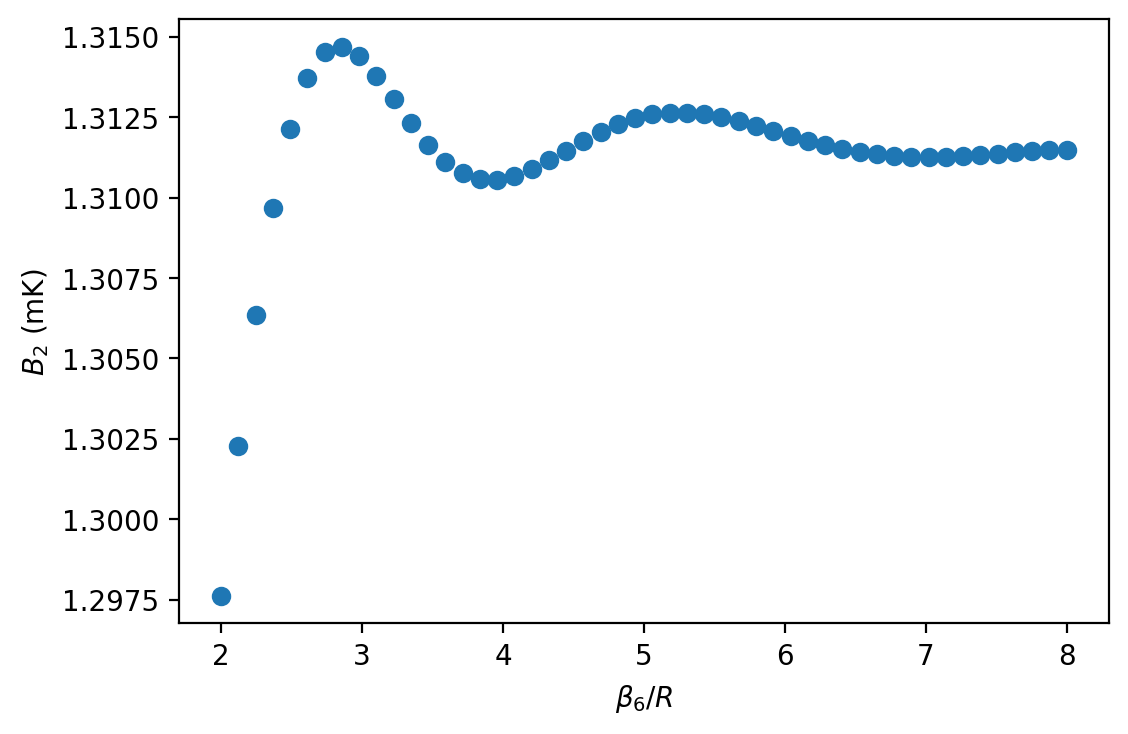

In [9]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], b2s*1000)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

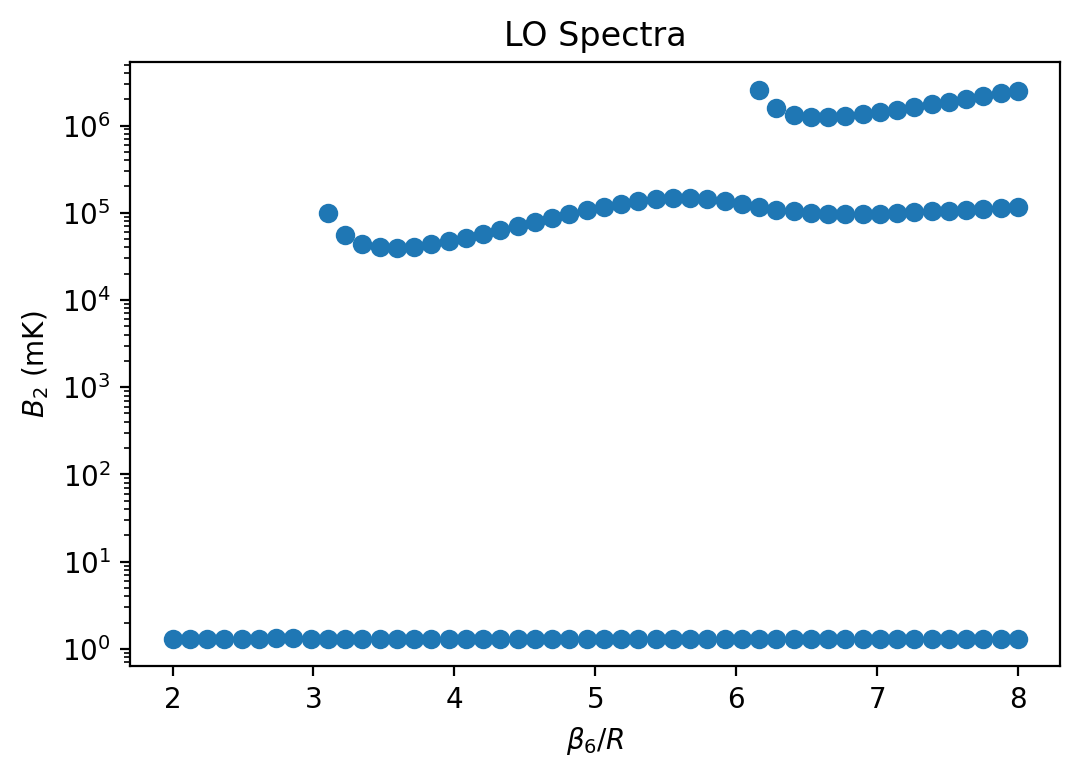

In [10]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (R, spec) in zip(rg_flow[:, 0], spectra):
    for s in spec:
        ax.scatter(he4.BETA6/R, -1000*s, color='C0')
        
ax.set_yscale('log')
# ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_title('LO Spectra')
ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

In [19]:
spectra_stack = np.zeros((nR, 3))

for (j, spec) in enumerate(spectra):
    row = np.zeros(3)
    for (i, s) in enumerate(spec):
        row[i] = s
    spectra_stack[j] = row

In [20]:
np.savetxt('datfiles/he4plusplus_spectra_nonlocal2.txt', np.vstack((rg_flow[:, 0], spectra_stack.T)).T)

In [25]:
from tqdm import tqdm

In [27]:
kcds_nlo = np.zeros((nR, momenta.size))

for i in tqdm(range(nR)):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    kcds_nlo[i] = s.kcotd_gen_fast(momenta, glo, gnlo)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:49<00:00,  2.34s/it]


In [31]:
spectra[-1]

array([-1.31096955e-03, -7.07440204e+01, -1.33349580e+04])

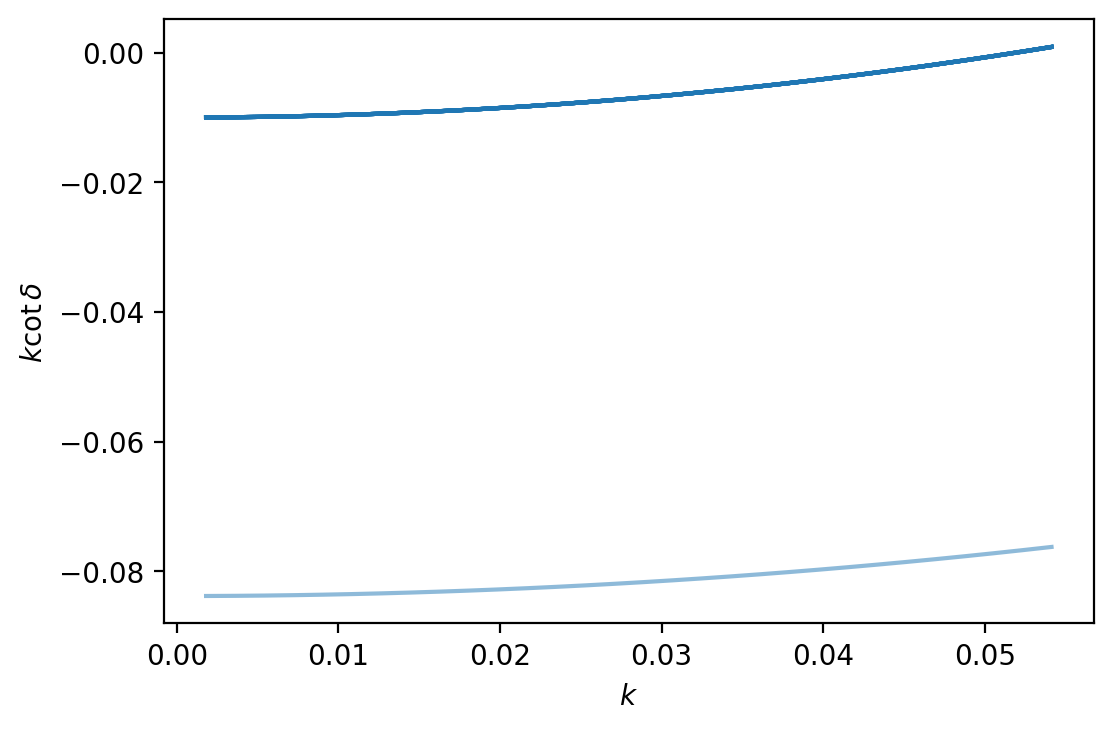

In [30]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in kcds_nlo:
    ax.plot(momenta, row, alpha=0.5)

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$k\cot\delta$');